# Estimating Daily Sunspots number using Data provided from NOAA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./NOAA dataset.csv",names=["Year","Month","Day","Data in fraction of year","Daily total sunspot number","Daily standard deviation of the input sunspot numbers from individual stations. ","Number of observations used to compute the daily value.","Definitive/provisional indicator. '1' indicates that the value is definitive. '0' indicates that the value is still provisional."],sep=";")

In [3]:
df.head()

,Year,Month,Day,Data in fraction of year,Daily total sunspot number,Daily standard deviation of the input sunspot numbers from individual stations.,Number of observations used to compute the daily value.,Definitive/provisional indicator. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1


## Data Pr-processing

### Creating DatetimeIndex

In [4]:
df["Date"] = pd.to_datetime(df[["Year","Month","Day"]])

In [5]:
df.head()

,Year,Month,Day,Data in fraction of year,Daily total sunspot number,Daily standard deviation of the input sunspot numbers from individual stations.,Number of observations used to compute the daily value.,Definitive/provisional indicator. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.,Date
0,1818,1,1,1818.001,-1,-1.0,0,1,1818-01-01
1,1818,1,2,1818.004,-1,-1.0,0,1,1818-01-02
2,1818,1,3,1818.007,-1,-1.0,0,1,1818-01-03
3,1818,1,4,1818.010,-1,-1.0,0,1,1818-01-04
4,1818,1,5,1818.012,-1,-1.0,0,1,1818-01-05


In [6]:
df = df.set_index("Date")

In [7]:
df

,Year,Month,Day,Data in fraction of year,Daily total sunspot number,Daily standard deviation of the input sunspot numbers from individual stations.,Number of observations used to compute the daily value.,Definitive/provisional indicator. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.
Date,,,,,,,,
1818-01-01,1818,1,1,1818.001,-1,-1.0,0,1
1818-01-02,1818,1,2,1818.004,-1,-1.0,0,1
1818-01-03,1818,1,3,1818.007,-1,-1.0,0,1
1818-01-04,1818,1,4,1818.010,-1,-1.0,0,1
1818-01-05,1818,1,5,1818.012,-1,-1.0,0,1
...,...,...,...,...,...,...,...,...
2025-05-27,2025,5,27,2025.401,104,9.7,25,0
2025-05-28,2025,5,28,2025.404,108,12.1,31,0
2025-05-29,2025,5,29,2025.407,100,13.2,25,0


## Setting the right data type for each column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75757 entries, 1818-01-01 to 2025-05-31
Data columns (total 8 columns):
 #   Column                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                            --------------  -----  
 0   Year                                                                                                                              75757 non-null  int64  
 1   Month                                                                                                                             75757 non-null  int64  
 2   Day                                                                                                                               75757 non-null  int64  
 3   Data in fraction of year                                                   

The data looks to be in the right formats for the respective columns

## Looking at the Right Data

In the TXT and CSV files, the missing values are marked by -1 (valid Sunspot Number are always positive).

In [9]:
df_filtered = df[df["Daily total sunspot number"] > -1 ]

In [10]:
df_filtered.head()

,Year,Month,Day,Data in fraction of year,Daily total sunspot number,Daily standard deviation of the input sunspot numbers from individual stations.,Number of observations used to compute the daily value.,Definitive/provisional indicator. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.
Date,,,,,,,,
1818-01-08,1818,1,8,1818.021,65,10.2,1,1
1818-01-13,1818,1,13,1818.034,37,7.7,1,1
1818-01-17,1818,1,17,1818.045,77,11.1,1,1
1818-01-18,1818,1,18,1818.048,98,12.6,1,1
1818-01-19,1818,1,19,1818.051,105,13.0,1,1




## 🌞 **Sunspot Number Data Description**

### ✅ **What is the Sunspot Number (R)?**

The **Sunspot Number** is a measure of solar activity — it tells us how "active" the Sun is in terms of visible sunspots.
It is calculated by the formula:

$$
R = N_s + 10 \times N_g
$$

Where:

* $N_s$ = number of **individual sunspots** counted
* $N_g$ = number of **groups of sunspots**

This formula emphasizes groups more strongly (multiplied by 10), because they represent more organized magnetic activity.

---

### 🗓️ **Time Range**

* **Daily data** start from **1 January 1818**.
* Before 1818, daily records are too sparse, so only **monthly and yearly averages** were compiled.

---

### 🕳️ **Missing Data**

* Marked as **-1** in the files (TXT or CSV).
* All valid sunspot numbers are positive.

---

### 📈 **New Scale (A. Wolfer’s scale)**

Historically, sunspot numbers were reduced to a lower scale using a correction factor (0.6), to make early data comparable with modern data.

* **Old way**: Apply factor 0.6 to correct for differences in observers' equipment and methods.
* **New way (after revision)**: No 0.6 correction. The numbers are now kept **at the scale of raw modern counts**.
  This makes modern and historical data more directly comparable and transparent.

---

### ⚖️ **Error values**

These represent how "uncertain" or "variable" the count is on a given day.

#### 🔹 **How are errors estimated?**

##### Before 1981

* Only one observer (essentially the Zürich Observatory).
* The error is **estimated** using an **auto-regressive model** (statistical approach), assuming the counts follow a **Poisson distribution** (common for count data).

#### From 1981 onwards

* Many observing stations worldwide contribute.
* The error is the **actual standard deviation** computed from all stations' observations on that day.

#### 🔹 **What is sigma/sqrt(N)?**

The **standard error** tells you how precisely the average daily value is known:

$$
\text{Standard error} = \frac{\sigma}{\sqrt{N}}
$$

Where:

* $\sigma$ = standard deviation across all observations that day.
* $N$ = number of observations (i.e., number of stations or observers).

##### Before 1981

* $N = 1$ because only one primary source (Zürich), so the standard error is just $\sigma$.

##### After 1981

* $N$ is the actual number of independent observations — reducing uncertainty as more stations contribute.

---

### ✅ **Key Takeaway**

| Period       | Observations  | Error estimate                 | Number of observations (N) |
| ------------ | ------------- | ------------------------------ | -------------------------- |
| Before 1818  | No daily data | —                              | —                          |
| 1818–1980    | One main obs  | Estimated with model           | N = 1                      |
| 1981–present | Multiple obs  | Actual standard deviation used | N = actual station count   |

---



In [11]:
df.drop(['Year', 'Month', 'Day', 'Data in fraction of year',],axis=1).describe()

,Daily total sunspot number,Daily standard deviation of the input sunspot numbers from individual stations.,Number of observations used to compute the daily value.,Definitive/provisional indicator. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.
count,75757.000000,75757.000000,75757.000000,75757.000000
mean,79.310836,7.074347,5.332999,0.998007
std,77.193477,5.022449,9.628977,0.044601
min,-1.000000,-1.000000,0.000000,0.000000
25%,15.000000,3.000000,1.000000,1.000000
50%,58.000000,6.600000,1.000000,1.000000
75%,125.000000,10.200000,1.000000,1.000000
max,528.000000,77.700000,69.000000,1.000000


/tmp/ipykernel_5884/784514827.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Daily total sunspot number"].resample("A").mean().plot(title='Yearly Mean Sunpots observed')


<Axes: title={'center': 'Yearly Mean Sunpots observed'}, xlabel='Date'>

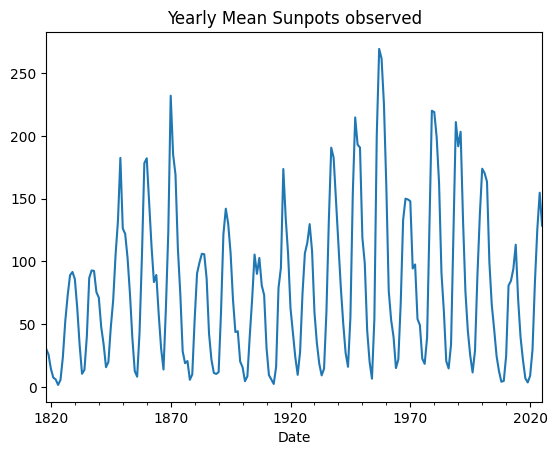

In [12]:
df["Daily total sunspot number"].resample("A").mean().plot(title='Yearly Mean Sunpots observed')

In [13]:
df["Daily total sunspot number"].resample("A").mean().idxmax()

/tmp/ipykernel_5884/3859669944.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Daily total sunspot number"].resample("A").mean().idxmax()


Timestamp('1957-12-31 00:00:00')

1957 saw the most average daily sunspot activity.

In [14]:
df["Daily total sunspot number"].resample("A").mean().idxmin()

/tmp/ipykernel_5884/52196151.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Daily total sunspot number"].resample("A").mean().idxmin()


Timestamp('1823-12-31 00:00:00')

1823 saw the least average daily sunspot activity

/tmp/ipykernel_5884/4190203953.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Daily total sunspot number"].resample("A").max().plot(title="Yearly Maximum daily activity observerd")


<Axes: title={'center': 'Yearly Maximum daily activity observerd'}, xlabel='Date'>

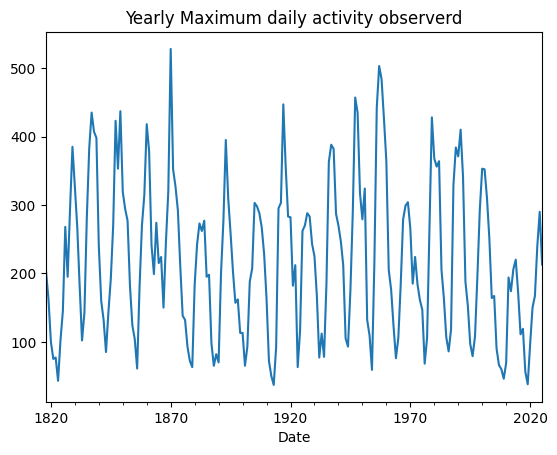

In [15]:
df["Daily total sunspot number"].resample("A").max().plot(title="Yearly Maximum daily activity observerd")

In [16]:
df["Daily total sunspot number"].resample("A").max().idxmax()

/tmp/ipykernel_5884/3016884557.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Daily total sunspot number"].resample("A").max().idxmax()


Timestamp('1870-12-31 00:00:00')

/tmp/ipykernel_5884/1316649908.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Daily total sunspot number"].resample("A").min().plot(title="Yearly mininmum activity observed")


<Axes: title={'center': 'Yearly mininmum activity observed'}, xlabel='Date'>

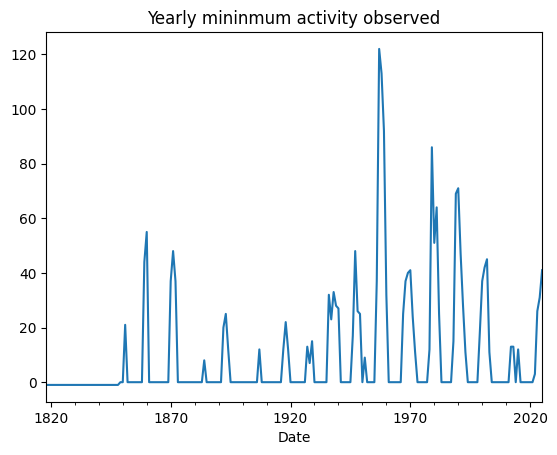

In [17]:
df["Daily total sunspot number"].resample("A").min().plot(title="Yearly mininmum activity observed")

In [18]:
df["Daily total sunspot number"].resample("A").min().idxmin()

/tmp/ipykernel_5884/3503011792.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Daily total sunspot number"].resample("A").min().idxmin()


Timestamp('1818-12-31 00:00:00')

In [19]:
df["Daily total sunspot number"].idxmax()

Timestamp('1870-08-26 00:00:00')

In [20]:
df["Daily total sunspot number"].idxmin()

Timestamp('1818-01-01 00:00:00')

/tmp/ipykernel_5884/666527108.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Daily total sunspot number"].resample("M").mean().plot()


<Axes: xlabel='Date'>

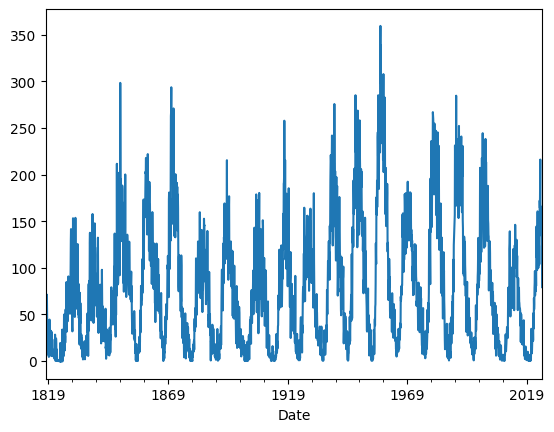

In [21]:
df["Daily total sunspot number"].resample("M").mean().plot()

In [22]:
df["Daily total sunspot number"].resample("M").mean().idxmax()

/tmp/ipykernel_5884/4024284249.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Daily total sunspot number"].resample("M").mean().idxmax()


Timestamp('1957-10-31 00:00:00')

In [23]:
df["Daily total sunspot number"].resample("M").mean().idxmin()

/tmp/ipykernel_5884/2446135650.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Daily total sunspot number"].resample("M").mean().idxmin()


Timestamp('1824-02-29 00:00:00')

In [24]:
!pip install statsmodels

In [25]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [26]:
help(hpfilter)

Help on function hpfilter in module statsmodels.tsa.filters.hp_filter:

hpfilter(x, lamb=1600)
    Hodrick-Prescott filter.
    
    Parameters
    ----------
    x : array_like
        The time series to filter, 1-d.
    lamb : float
        The Hodrick-Prescott smoothing parameter. A value of 1600 is
        suggested for quarterly data. Ravn and Uhlig suggest using a value
        of 6.25 (1600/4**4) for annual data and 129600 (1600*3**4) for monthly
        data.
    
    Returns
    -------
    cycle : ndarray
        The estimated cycle in the data given lamb.
    trend : ndarray
        The estimated trend in the data given lamb.
    
    See Also
    --------
    statsmodels.tsa.filters.bk_filter.bkfilter
        Baxter-King filter.
    statsmodels.tsa.filters.cf_filter.cffilter
        The Christiano Fitzgerald asymmetric, random walk filter.
    statsmodels.tsa.seasonal.seasonal_decompose
        Decompose a time series using moving averages.
    statsmodels.tsa.seasonal.STL


In [27]:
spot_cycle, spot_trend = hpfilter(df['Daily total sunspot number'],lamb=129600)

In [28]:
df["Cycle"] = spot_cycle

In [29]:
df["Trend"] = spot_trend

<Axes: xlabel='Date'>

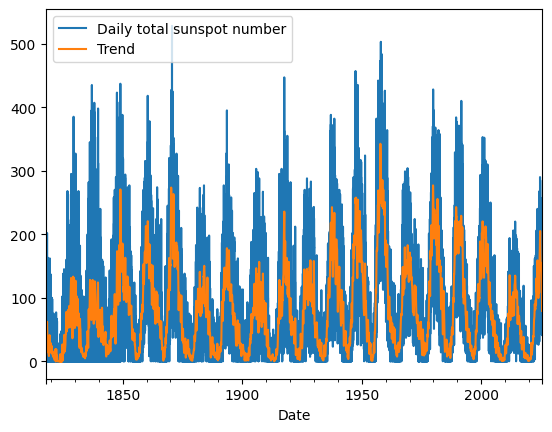

In [30]:
df[["Daily total sunspot number","Trend"]].plot()

<Axes: xlabel='Date'>

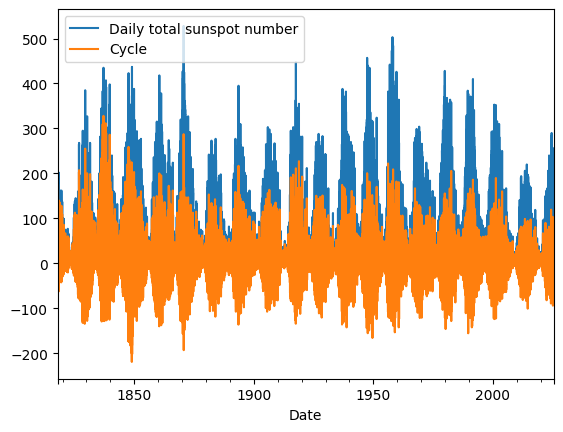

In [31]:
df[["Daily total sunspot number","Cycle"]].plot()



# 🔎 **HP filter: What is it?**

The **Hodrick–Prescott (HP) filter** is a mathematical tool used to separate a time series $y_t$ into two parts:

$$
y_t = \tau_t + c_t
$$

Where:

* $\tau_t$: **Trend component** — smooth, long-term movement.
* $c_t$: **Cyclical component** — short-term fluctuations around the trend.

---

# 📈 **What is the *trend*?**

* The **trend** $\tau_t$ represents the **long-term underlying path** of the data.
* It shows the "persistent" direction — for example, a steady upward or downward slope.
* In economics, for instance, it might represent long-term GDP growth unaffected by recessions or booms.

---

# 🔁 **What is the *cycle*?**

* The **cycle** $c_t$ is what’s **left over** after you subtract the trend:

$$
c_t = y_t - \tau_t
$$

* It represents **short-term deviations**, such as business cycles, seasonal effects, or temporary shocks.
* Usually oscillates around zero (positive in "boom" periods, negative in "slump" periods).

---

# 💡 **How does the HP filter separate them?**

It finds a smooth trend $\tau_t$ that minimizes:

$$
\sum_{t=1}^{T} (y_t - \tau_t)^2 + \lambda \sum_{t=2}^{T-1} [(\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1})]^2
$$

Where:

* The first term keeps the trend close to the data.
* The second term penalizes rapid changes in the trend’s growth rate (keeps it smooth).
* $\lambda$ controls smoothness (common choice: $\lambda = 1600$ for quarterly data).

---

# 🟢 **Intuitive difference**

| Concept   | Represents              | Time scale    | Moves slowly or quickly? |
| --------- | ----------------------- | ------------- | ------------------------ |
| **Trend** | Long-term growth path   | Years/decades | Moves slowly             |
| **Cycle** | Short-term fluctuations | Months/years  | Moves more quickly       |

---

# ✅ **Summary**

* **Trend**: Smooth, slow-moving backbone of the series.
* **Cycle**: The wiggly, temporary ups and downs around that backbone.

---


<Figure size 1200x1400 with 0 Axes>

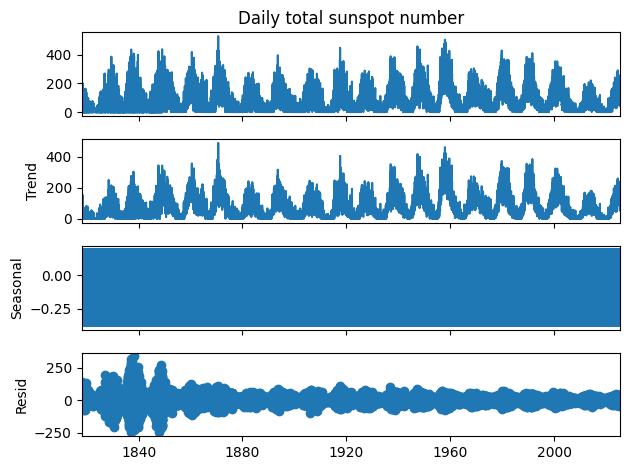

<Figure size 1200x1400 with 0 Axes>

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Daily total sunspot number"], model='additive')
result.plot()
plt.figure(figsize=(12,14))

In [33]:
df["EWM12"] = df["Daily total sunspot number"].ewm(span=12,adjust=False).mean()

<Axes: xlabel='Date'>

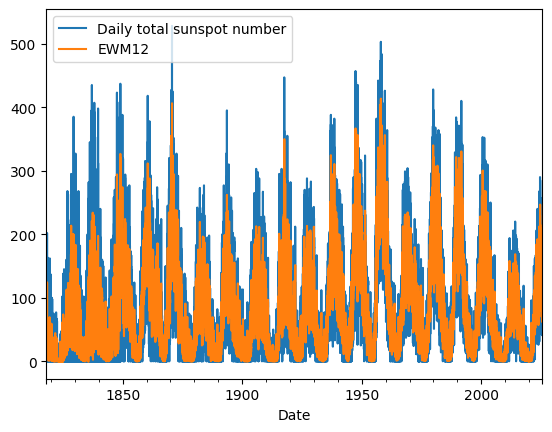

In [34]:
df[["Daily total sunspot number","EWM12"]].plot()

In [35]:
df["EWM365_Adjust"] = df["Daily total sunspot number"].ewm(span=365,adjust=True).mean()

<Axes: xlabel='Date'>

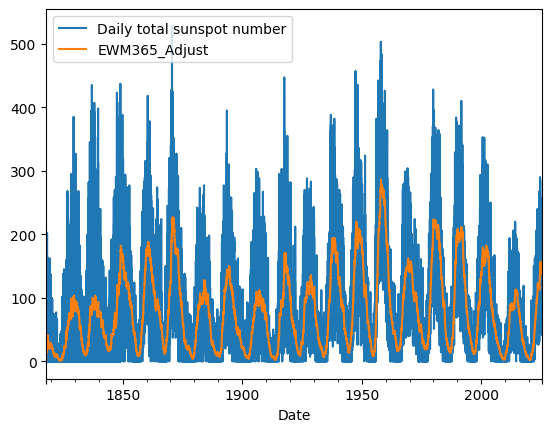

In [36]:
df[["Daily total sunspot number","EWM365_Adjust"]].plot()

In [37]:
split_point = int(0.8 * len(df))
split_date = df.index[split_point]
print(split_date)
df.index.freq = "D"

1983-12-07 00:00:00


In [38]:
train_df = df.loc[:split_date]
test_df = df.loc[split_date:]


In [39]:
train_df

,Year,Month,Day,Data in fraction of year,Daily total sunspot number,Daily standard deviation of the input sunspot numbers from individual stations.,Number of observations used to compute the daily value.,Definitive/provisional indicator. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.,Cycle,Trend,EWM12,EWM365_Adjust
Date,,,,,,,,,,,,
1818-01-01,1818,1,1,1818.001,-1,-1.0,0,1,-12.293201,11.293201,-1.000000,-1.000000
1818-01-02,1818,1,2,1818.004,-1,-1.0,0,1,-12.481417,11.481417,-1.000000,-1.000000
1818-01-03,1818,1,3,1818.007,-1,-1.0,0,1,-12.669539,11.669539,-1.000000,-1.000000
1818-01-04,1818,1,4,1818.010,-1,-1.0,0,1,-12.857374,11.857374,-1.000000,-1.000000
1818-01-05,1818,1,5,1818.012,-1,-1.0,0,1,-13.044635,12.044635,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1983-12-03,1983,12,3,1983.922,21,4.3,13,1,-21.374916,42.374916,24.271566,97.067458
1983-12-04,1983,12,4,1983.925,19,7.7,13,1,-23.431416,42.431416,23.460556,96.640860
1983-12-05,1983,12,5,1983.927,23,5.2,15,1,-19.516825,42.516825,23.389701,96.238451


In [40]:
test_df

,Year,Month,Day,Data in fraction of year,Daily total sunspot number,Daily standard deviation of the input sunspot numbers from individual stations.,Number of observations used to compute the daily value.,Definitive/provisional indicator. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.,Cycle,Trend,EWM12,EWM365_Adjust
Date,,,,,,,,,,,,
1983-12-07,1983,12,7,1983.933,56,5.5,16,1,13.230612,42.769388,32.261265,95.783584
1983-12-08,1983,12,8,1983.936,66,8.5,11,1,23.066097,42.933903,37.451840,95.620832
1983-12-09,1983,12,9,1983.938,97,5.4,12,1,53.877696,43.122304,46.613095,95.628368
1983-12-10,1983,12,10,1983.941,112,10.4,13,1,68.666409,43.333591,56.672619,95.717831
1983-12-11,1983,12,11,1983.944,104,7.0,11,1,60.432818,43.567182,63.953754,95.763089
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-27,2025,5,27,2025.401,104,9.7,25,0,21.757123,82.242877,91.233931,137.897236
2025-05-28,2025,5,28,2025.404,108,12.1,31,0,26.505833,81.494167,93.813326,137.733863
2025-05-29,2025,5,29,2025.407,100,13.2,25,0,19.252996,80.747004,94.765122,137.527667


In [41]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [42]:
span = 365
alpha = 2/(span+1)

In [43]:
model = SimpleExpSmoothing(train_df["Daily total sunspot number"]).fit(smoothing_level=alpha, optimized=False)

In [44]:
test_df["SES Predictions"] = model.forecast(len(test_df))

/tmp/ipykernel_5884/400836758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["SES Predictions"] = model.forecast(len(test_df))


<Axes: xlabel='Date'>

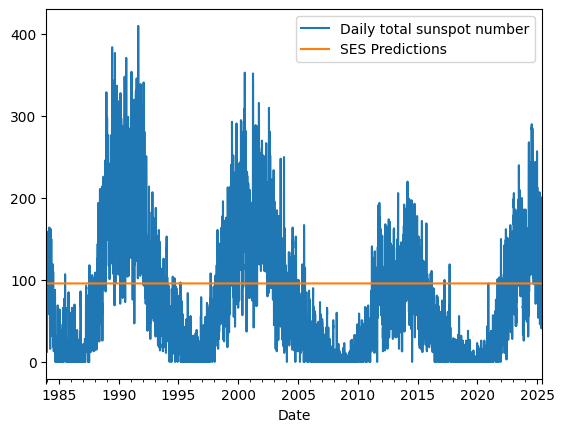

In [45]:
test_df[["Daily total sunspot number","SES Predictions"]].plot()

In [46]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [47]:
model_es_trend = ExponentialSmoothing(train_df["Daily total sunspot number"], trend='add').fit(optimized=True, use_brute=True)

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [48]:
test_df["ES predictions"] = model_es_trend.forecast(len(test_df))

/tmp/ipykernel_5884/894816051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["ES predictions"] = model_es_trend.forecast(len(test_df))


<Axes: xlabel='Date'>

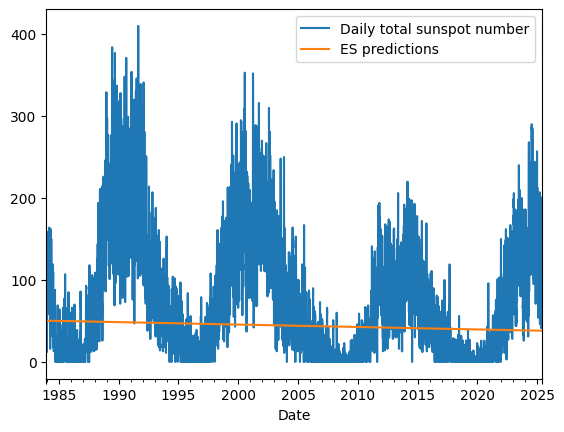

In [49]:
test_df[["Daily total sunspot number","ES predictions"]].plot()

In [50]:
model_es_seasonal = ExponentialSmoothing(train_df["Daily total sunspot number"], trend='add',seasonal="add").fit(optimized=True, use_brute=True)

In [51]:
test_df["ES_seasonal"] = model_es_seasonal.forecast(len(test_df))

/tmp/ipykernel_5884/3821016043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["ES_seasonal"] = model_es_seasonal.forecast(len(test_df))


<Axes: xlabel='Date'>

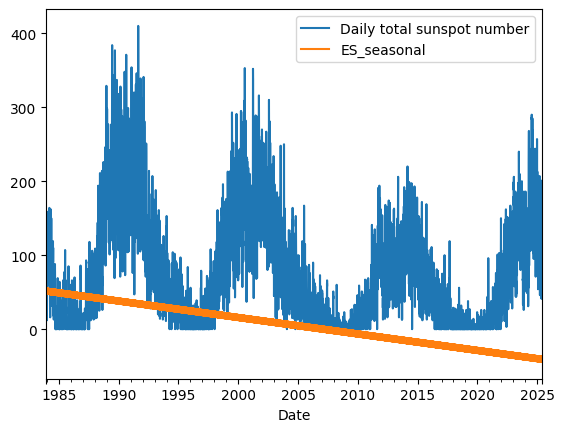

In [52]:
test_df[["Daily total sunspot number","ES_seasonal"]].plot()

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

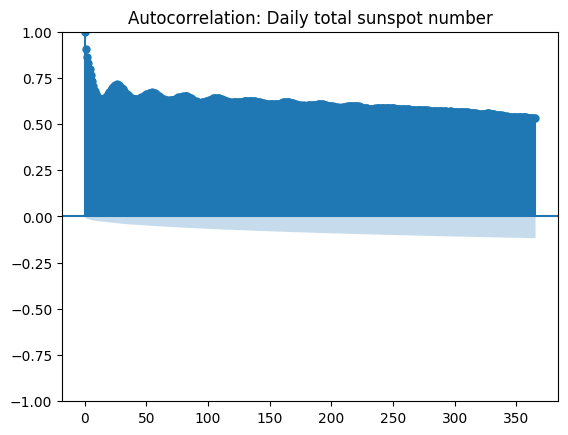

In [54]:
title = 'Autocorrelation: Daily total sunspot number'
lags = 365
plot_acf(df["Daily total sunspot number"],title=title,lags=lags);

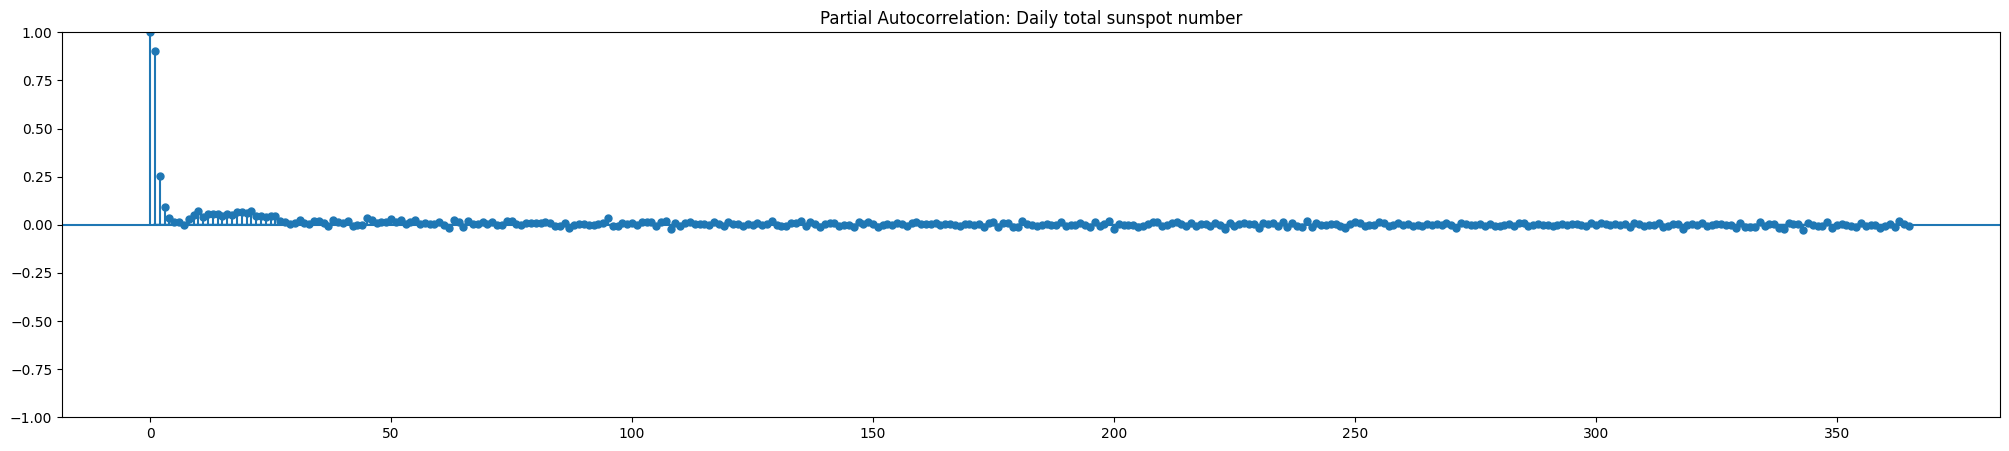

In [55]:
title='Partial Autocorrelation: Daily total sunspot number'
lags= 365
fig, ax = plt.subplots(figsize=(25,5))
plot_pacf(df["Daily total sunspot number"],title=title,lags=lags,ax=ax);

In [56]:
from statsmodels.tsa.stattools import acf,pacf,pacf_yw,pacf_ols

In [57]:
acf = acf(df["Daily total sunspot number"],nlags=365)

In [58]:
len(acf)

366

In [59]:
acf

array([1.        , 0.90508777, 0.86517647, 0.82984398, 0.79599565,
       0.76349967, 0.73395378, 0.70410621, 0.68064463, 0.66315827,
       0.65282837, 0.64172666, 0.63616149, 0.63411467, 0.63495153,
       0.63644293, 0.64065219, 0.64555463, 0.65411561, 0.66388525,
       0.67366988, 0.68534404, 0.69333604, 0.70038706, 0.70584675,
       0.71058252, 0.71448321, 0.71327309, 0.70916134, 0.70190615,
       0.69428295, 0.68821332, 0.67921077, 0.66947432, 0.66217672,
       0.65595613, 0.64954836, 0.64191902, 0.63957336, 0.63706273,
       0.63538594, 0.6367037 , 0.63496174, 0.63378951, 0.63375115,
       0.63950822, 0.64409862, 0.64700385, 0.65117173, 0.65523207,
       0.66075417, 0.66447265, 0.66910944, 0.66941953, 0.67029563,
       0.67171267, 0.6691251 , 0.66635731, 0.66191666, 0.65721385,
       0.65376122, 0.64854307, 0.64040361, 0.6382945 , 0.63553096,
       0.63000592, 0.6299243 , 0.62792839, 0.62681016, 0.62826846,
       0.62868466, 0.63151171, 0.63233782, 0.63339611, 0.63750

In [60]:
pacf_ds = pacf(df["Daily total sunspot number"],nlags=365)

In [61]:
pacf_ds

array([ 1.00000000e+00,  9.05099714e-01,  2.54398310e-01,  9.31231921e-02,
        3.36562269e-02,  1.20312724e-02,  1.40153477e-02, -1.01858409e-03,
        2.92624180e-02,  4.94675668e-02,  7.03587210e-02,  3.81809265e-02,
        5.39539267e-02,  5.73735400e-02,  5.73057569e-02,  4.66603240e-02,
        5.40766569e-02,  5.18785104e-02,  6.82783182e-02,  6.80444584e-02,
        6.16941480e-02,  7.21701481e-02,  4.59618151e-02,  4.42967837e-02,
        4.04660212e-02,  4.48184400e-02,  4.70098268e-02,  2.10437889e-02,
        1.28503414e-02,  3.43309671e-03,  1.10485538e-02,  2.54168501e-02,
        7.12048302e-03,  3.20026925e-03,  1.75569378e-02,  1.79117574e-02,
        7.90216625e-03, -6.66028525e-03,  2.38188107e-02,  1.30596483e-02,
        8.57284796e-03,  2.05375946e-02, -5.41314991e-03, -2.68600367e-03,
        1.01736935e-03,  3.65391406e-02,  2.25314464e-02,  7.43077390e-03,
        1.61904721e-02,  1.66585026e-02,  2.78099276e-02,  1.54539700e-02,
        2.62072308e-02,  

In [62]:
pacf_ds_1 = pacf_yw(df["Daily total sunspot number"],nlags=365)

In [63]:
pacf_ds_1

array([ 1.00000000e+00,  9.05099714e-01,  2.54398310e-01,  9.31231921e-02,
        3.36562269e-02,  1.20312724e-02,  1.40153477e-02, -1.01858409e-03,
        2.92624180e-02,  4.94675668e-02,  7.03587210e-02,  3.81809265e-02,
        5.39539267e-02,  5.73735400e-02,  5.73057569e-02,  4.66603240e-02,
        5.40766569e-02,  5.18785104e-02,  6.82783182e-02,  6.80444584e-02,
        6.16941480e-02,  7.21701481e-02,  4.59618151e-02,  4.42967837e-02,
        4.04660212e-02,  4.48184400e-02,  4.70098268e-02,  2.10437889e-02,
        1.28503414e-02,  3.43309671e-03,  1.10485538e-02,  2.54168501e-02,
        7.12048302e-03,  3.20026925e-03,  1.75569378e-02,  1.79117574e-02,
        7.90216625e-03, -6.66028525e-03,  2.38188107e-02,  1.30596483e-02,
        8.57284796e-03,  2.05375946e-02, -5.41314991e-03, -2.68600367e-03,
        1.01736935e-03,  3.65391406e-02,  2.25314464e-02,  7.43077390e-03,
        1.61904721e-02,  1.66585026e-02,  2.78099276e-02,  1.54539700e-02,
        2.62072308e-02,  

In [64]:
pacf_ds2 = pacf_ols(df["Daily total sunspot number"],nlags=365)

In [65]:
pacf_ds2

array([ 1.00000000e+00,  9.05090321e-01,  2.54390616e-01,  9.31147235e-02,
        3.36585038e-02,  1.20353487e-02,  1.40234107e-02, -1.01524108e-03,
        2.91981337e-02,  4.94948721e-02,  7.03653150e-02,  3.81811744e-02,
        5.39412944e-02,  5.73170131e-02,  5.72980023e-02,  4.66497388e-02,
        5.40642315e-02,  5.17766108e-02,  6.81809009e-02,  6.79647973e-02,
        6.17263450e-02,  7.21735607e-02,  4.59467036e-02,  4.42712970e-02,
        4.04260688e-02,  4.47340515e-02,  4.69563892e-02,  2.10099339e-02,
        1.27677312e-02,  3.38834839e-03,  1.10244678e-02,  2.54013999e-02,
        7.11537021e-03,  3.19281558e-03,  1.75231306e-02,  1.79027706e-02,
        7.88637792e-03, -6.67528357e-03,  2.38223185e-02,  1.30533308e-02,
        8.48164469e-03,  2.05311770e-02, -5.40721213e-03, -2.69231681e-03,
        8.10828304e-04,  3.64962102e-02,  2.24892451e-02,  7.43113934e-03,
        1.62025693e-02,  1.66703639e-02,  2.78142465e-02,  1.54295338e-02,
        2.61708695e-02,  

In [66]:
from statsmodels.tsa.stattools import adfuller,kpss

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [67]:
adf_test(df["Daily total sunspot number"],"Daily total sunspot number")

Augmented Dickey-Fuller Test: Daily total sunspot number
ADF test statistic     -8.038405e+00
p-value                 1.875472e-12
# lags used             6.300000e+01
# observations          7.569300e+04
critical value (1%)    -3.430436e+00
critical value (5%)    -2.861578e+00
critical value (10%)   -2.566790e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [68]:
kpss(df["Daily total sunspot number"],regression='ct')

/tmp/ipykernel_5884/3672385341.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(df["Daily total sunspot number"],regression='ct')


(0.4580673739546899,
 0.01,
 155,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [69]:
kpss(df["Daily total sunspot number"],regression='c')

/tmp/ipykernel_5884/347007722.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(df["Daily total sunspot number"],regression='c')


(1.697904077874519,
 0.01,
 155,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [70]:
from statsmodels.tsa.ar_model import AutoReg

In [71]:
model = AutoReg(train_df['Daily total sunspot number'],lags=2)
AR1fit = model.fit()

In [72]:
pred_test = AR1fit.predict(start=test_df.index[0], end=test_df.index[-1], dynamic=False)

In [73]:
test_df["AR_pred_test"] = pred_test

/tmp/ipykernel_5884/95832969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["AR_pred_test"] = pred_test


<Axes: xlabel='Date'>

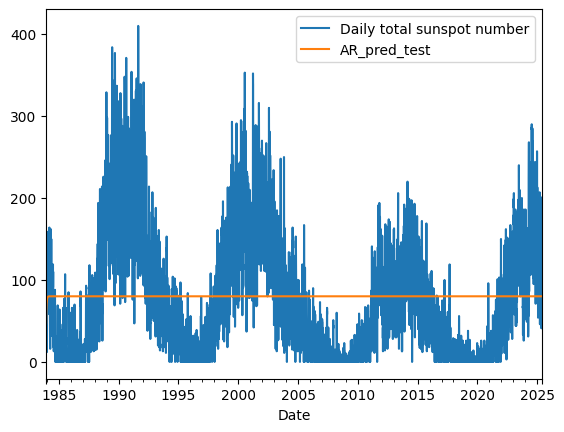

In [74]:
test_df[["Daily total sunspot number","AR_pred_test"]].plot()

In [101]:
from pmdarima import auto_arima

In [102]:
auto_arima_model = auto_arima(train_df["Daily total sunspot number"],seasonal=True)

In [103]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [104]:
arma_model = arma_order_select_ic(train_df["Daily total sunspot number"])

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [105]:
auto_arima_model

ARIMA(order=(5, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [107]:
help(auto_arima_model)

Help on ARIMA in module pmdarima.arima.arima object:

class ARIMA(pmdarima.base.BaseARIMA)
 |  ARIMA(order, seasonal_order=(0, 0, 0, 0), start_params=None, method='lbfgs', maxiter=50, suppress_warnings=False, out_of_sample_size=0, scoring='mse', scoring_args=None, trend=None, with_intercept=True, **sarimax_kwargs)
 |  
 |  An ARIMA estimator.
 |  
 |  An ARIMA, or autoregressive integrated moving average, is a
 |  generalization of an autoregressive moving average (ARMA) and is fitted to
 |  time-series data in an effort to forecast future points. ARIMA models can
 |  be especially efficacious in cases where data shows evidence of
 |  non-stationarity.
 |  
 |  The "AR" part of ARIMA indicates that the evolving variable of interest is
 |  regressed on its own lagged (i.e., prior observed) values. The "MA" part
 |  indicates that the regression error is actually a linear combination of
 |  error terms whose values occurred contemporaneously and at various times
 |  in the past. The "I" 

In [109]:
test_df["auto_arima"] = auto_arima_model.predict(n_periods=len(test_df))

/tmp/ipykernel_5884/1065987107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["auto_arima"] = auto_arima_model.predict(n_periods=len(test_df))


In [111]:
auto_arima_model.predict(n_periods=len(test_df))

1983-12-08    56.835766
1983-12-09    59.675015
1983-12-10    61.683502
1983-12-11    62.147899
1983-12-12    62.788210
                ...    
2025-05-28    64.776891
2025-05-29    64.776891
2025-05-30    64.776891
2025-05-31    64.776891
2025-06-01    64.776891
Freq: D, Length: 15152, dtype: float64

<Axes: xlabel='Date'>

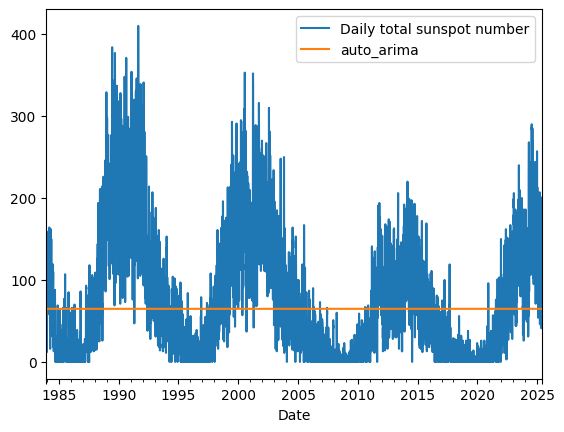

In [112]:
test_df[["Daily total sunspot number","auto_arima"]].plot()

In [133]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [134]:
window_size = 7

X_list = []
y_list = []
y_dates = []

for i in range(len(df) - window_size):
    window = df.iloc[i:i+window_size]["Daily total sunspot number"].values
    target = df.iloc[i + window_size]["Daily total sunspot number"]
    
    X_list.append(window)
    y_list.append(target)
    y_dates.append(df.index[i + window_size])
    
X = np.array(X_list)
y = np.array(y_list)

In [135]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (75750, 7)
y shape: (75750,)


In [136]:
split_idx = int(len(X) * 0.8)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]
y_dates_train, y_dates_val = y_dates[:split_idx], y_dates[split_idx:]

print(f"Train samples: {len(X_train)}, Val samples: {len(X_val)}")

Train samples: 60600, Val samples: 15150


In [137]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # (samples, seq_len, 1)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  # (samples, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
val_dataset = TimeSeriesDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

In [142]:
class CNNLSTM(nn.Module):
    def __init__(
        self, 
        cnn_channels=16, 
        lstm_hidden_dim=32, 
        lstm_layers=1, 
        dropout_cnn=0.2, 
        dropout_lstm=0.3
    ):
        super().__init__()
        
        # 3 CNN blocks with BatchNorm + ReLU + Dropout
        self.cnn = nn.Sequential(
            nn.Conv1d(1, cnn_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(cnn_channels),
            nn.ReLU(),
            nn.Dropout(dropout_cnn),
            
            nn.Conv1d(cnn_channels, 32, kernel_size=3, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(dropout_cnn),

            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(dropout_cnn)
        )
        
        # LSTM expects input size = 64 now (from last CNN layer)
        self.lstm = nn.LSTM(
            input_size=64, 
            hidden_size=lstm_hidden_dim,
            num_layers=lstm_layers, 
            batch_first=True, 
            dropout=dropout_lstm if lstm_layers > 1 else 0.0
        )
        
        self.dropout_lstm_out = nn.Dropout(dropout_lstm)
        
        self.fc = nn.Linear(lstm_hidden_dim, 1)

    def forward(self, x):
        # x: (batch, seq_len, 1)
        x = x.permute(0, 2, 1)  # (batch, 1, seq_len)
        x = self.cnn(x)         # (batch, 64, seq_len)
        x = x.permute(0, 2, 1)  # (batch, seq_len, 64)
        
        out, _ = self.lstm(x)   # (batch, seq_len, lstm_hidden_dim)
        out = out[:, -1, :]     # last time step
        
        out = self.dropout_lstm_out(out)
        out = self.fc(out)
        return out

In [143]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNNLSTM().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

patience = 5                # How many epochs to wait after last improvement
best_val_loss = float('inf')
epochs_no_improve = 0

num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    train_losses = []
    
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    
    model.eval()
    val_losses = []
    with torch.no_grad():
        for val_x, val_y in val_loader:
            val_x, val_y = val_x.to(device), val_y.to(device)
            val_output = model(val_x)
            val_loss = criterion(val_output, val_y)
            val_losses.append(val_loss.item())
    
    avg_train_loss = np.mean(train_losses)
    avg_val_loss = np.mean(val_losses)
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f}")
    
    # --- Check for improvement ---
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save best model

# --- Load best model after training ---
model.load_state_dict(torch.load("best_model.pth"))

Epoch 1/50 - Train Loss: 6799.7440 - Val Loss: 2514.0118
Epoch 2/50 - Train Loss: 2811.8737 - Val Loss: 885.4812
Epoch 3/50 - Train Loss: 1971.0539 - Val Loss: 587.7940
Epoch 4/50 - Train Loss: 1766.5031 - Val Loss: 487.3994
Epoch 5/50 - Train Loss: 1687.5886 - Val Loss: 368.8255
Epoch 6/50 - Train Loss: 1647.8554 - Val Loss: 381.2706
Epoch 7/50 - Train Loss: 1609.4717 - Val Loss: 372.6718
Epoch 8/50 - Train Loss: 1610.9489 - Val Loss: 361.3653
Epoch 9/50 - Train Loss: 1583.0466 - Val Loss: 425.0388
Epoch 10/50 - Train Loss: 1585.9528 - Val Loss: 385.1393
Epoch 11/50 - Train Loss: 1573.9674 - Val Loss: 309.1237
Epoch 12/50 - Train Loss: 1567.3627 - Val Loss: 335.8651
Epoch 13/50 - Train Loss: 1557.4411 - Val Loss: 278.5478
Epoch 14/50 - Train Loss: 1560.7705 - Val Loss: 341.4622
Epoch 15/50 - Train Loss: 1539.1088 - Val Loss: 356.3756
Epoch 16/50 - Train Loss: 1529.3167 - Val Loss: 529.9203
Epoch 17/50 - Train Loss: 1551.8132 - Val Loss: 397.4735
Epoch 18/50 - Train Loss: 1532.2999 - V

<All keys matched successfully>

In [144]:
model.eval()
all_X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1).to(device)
with torch.no_grad():
    preds = model(all_X_tensor).cpu().numpy().flatten()

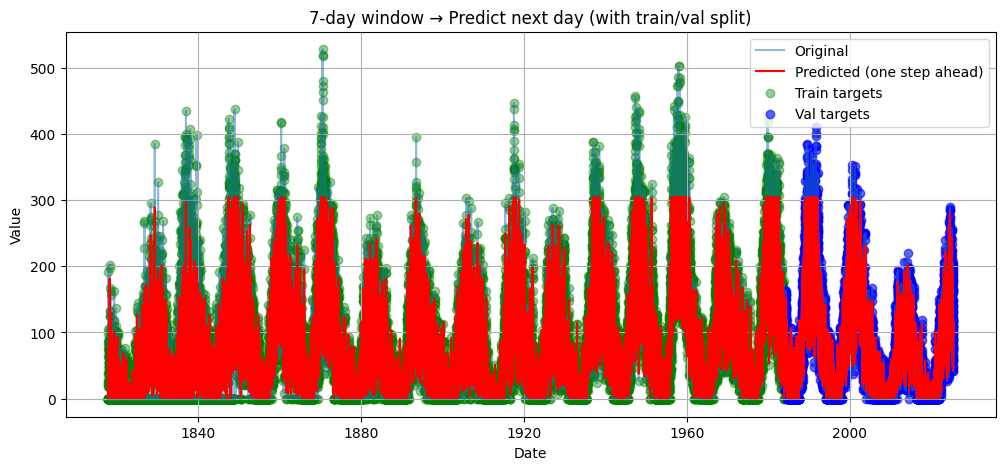

In [145]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Daily total sunspot number"], label="Original", alpha=0.5)
plt.plot(y_dates, preds, label="Predicted (one step ahead)", color="red")
plt.scatter(y_dates_train, y_train, color="green", alpha=0.4, label="Train targets")
plt.scatter(y_dates_val, y_val, color="blue", alpha=0.6, label="Val targets")
plt.legend()
plt.title("7-day window → Predict next day (with train/val split)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()